In [2]:
import zipfile
import urllib.request
import os

year = 2010
data_path = '\\Users\\jesus\\Desktop\\143_ECE\\Final_Project\\recursive_predictions\\ozone_data\\'
for i in range(11):
    pass
    url = 'https://aqs.epa.gov/aqsweb/airdata/daily_42101_'+str(year)+'.zip'
    print(url)
    urllib.request.urlretrieve(url, data_path+'ozone_data'+str(year)+'.zip')
    with zipfile.ZipFile(data_path+'ozone_data'+str(year)+'.zip', 'r') as zip_ref:
        zip_ref.extractall(data_path+str(year)+'_data')
    
    os.remove(data_path+'ozone_data'+str(year)+'.zip') 

    year +=1

https://aqs.epa.gov/aqsweb/airdata/daily_42101_2010.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2011.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2012.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2013.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2014.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2015.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2016.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2017.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2018.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2019.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2020.zip


In [3]:
import csv
def convine_data_files():
    data_path = '\\Users\\jesus\\Desktop\\143_ECE\\Final_Project\\recursive_predictions\\ozone_data\\'
    year = 2010
    lines = []
    for i in range(11):
        with open(data_path+str(year)+'_data'+'\\daily_42101_'+str(year)+'.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for line in list(reader):
                lines.append(line)
        year += 1
    return lines

In [5]:
ozone_data = convine_data_files()

In [101]:
import matplotlib.pyplot as plt
from datetime import timezone
from datetime import datetime
import numpy as np
import itertools

class city_regression:
    def __init__(self, data, city_name):
        self.city_name = city_name
        self.data = []
        self.data_float = []
        print(len(data))
        for ind_measurment in data:
            if(city_name in ind_measurment):
                self.data.append([datetime.strptime(ind_measurment[11],"%Y-%m-%d"),float(ind_measurment[16])])
                self.data_float.append([datetime.strptime(ind_measurment[11],"%Y-%m-%d").timestamp(),float(ind_measurment[16])])
        #self.data_float[1] = np.convolve(self.data_float[1], np.ones(30), 'valid') / 7
        #self.data_float[1] = list(itertools.islice(self.data_float[1],0,len(self.data_float[1])-1,7))
        #x = list(itertools.islice(self.data_float[0],0,len(self.data_float[0])-1,7))        
   
    def __str__(self):
        return str(self.city_name)
    def print_graph(self):
        a = np.asarray(self.data)

        x, y = a.T
        y = np.convolve(y, np.ones(30), 'valid') / 7
        y = list(itertools.islice(y,0,len(y)-1,7))
        x = list(itertools.islice(x,0,len(x)-1,7))
        print(len(x[0:-4]), len(y))
        plt.plot(x[0:-4],y)
        plt.show()
        
        

In [102]:
aCity = city_regression(ozone_data,"El Cajon")
print(aCity)

2227435
El Cajon


In [103]:
print(len(aCity.data))

6657


947 947


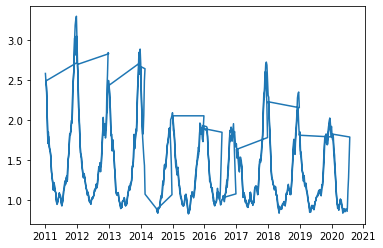

In [104]:
aCity.print_graph()

2227435
Oakland West
7682
1094 1094


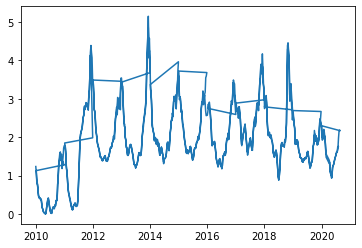

In [135]:
anotherCity = city_regression(ozone_data,"Oakland West")
print(anotherCity)
print(len(anotherCity.data))
anotherCity.print_graph()

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [246]:
start_date = datetime(2010,1,1)
end_date = datetime(2020,9,1)
data_to_test = aCity.data#[:7255]
print(data_to_test[-1])

[datetime.datetime(2020, 8, 1, 0, 0), 0.3]


2019-12-25 00:00:00
790 790


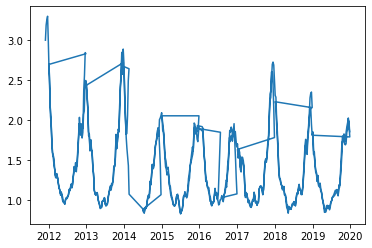

In [257]:
a = np.asarray(data_to_test)

x, y = a.T
y = np.convolve(y, np.ones(30), 'valid') / 7
y = list(itertools.islice(y,0,len(y)-1,7))
x = list(itertools.islice(x,0,len(x)-1,7))
trainData = (x[100:890],y[100:890])
print(trainData[0][-1])
print(len(trainData[0]), len(trainData[1]))
plt.plot(trainData[0],trainData[1])
plt.show()

In [258]:
test_data = (y[890:])
print(test_data)

[1.918255571428571, 1.7883607142857145, 1.8210270000000004, 1.7854511428571427, 1.6254784285714288, 1.5603768571428571, 1.3921382857142857, 1.2111785714285717, 1.070080857142857, 0.9892742857142859, 0.8958657142857144, 0.8963975714285712, 0.8705181428571428, 0.9221565714285713, 0.9886544285714286, 1.0033228571428572, 0.9925895714285716, 0.9352887142857144, 0.8950969999999999, 0.861345, 0.8698775714285713, 0.8689257142857143, 0.8507631428571429, 0.8849668571428572, 0.8756282857142856, 0.8732350000000001, 0.8898860000000001, 1.1217565714285713, 1.2774278571428572, 1.5245637142857142, 1.7861997142857142, 1.8241571428571426, 1.7565532857142858, 1.7696252857142862, 1.6120577142857146, 1.4867402857142853, 1.392378571428571, 1.2576797142857143, 1.113492142857143, 1.0087304285714287, 0.9428572857142858, 0.9181820000000002, 0.9073882857142859, 0.947955142857143, 0.9464845714285718, 1.0124764285714287, 0.9851748571428571, 0.9430207142857144, 0.9001460000000003, 0.8342264285714288, 0.871668142857

In [259]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 52)
# define model
model = SARIMAX(trainData[1], order=my_order, seasonal_order=my_seasonal_order)

In [260]:
model_fit = model.fit()

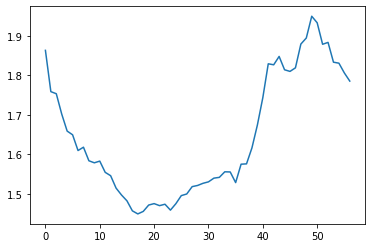

In [261]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
plt.plot(list(range(len(predictions))),predictions)
plt.show()
residuals = test_data - predictions

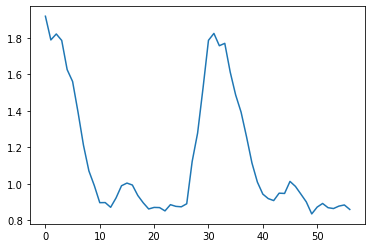

In [262]:
plt.plot(list(range(len(test_data))),test_data)
plt.show()

Text(0, 0.5, 'Error')

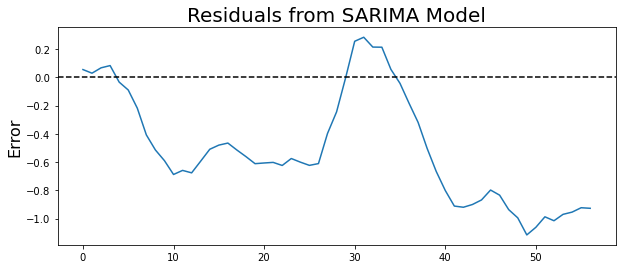

In [263]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)